# CSE 574 - Introduction to Machine Learning - PROJECT 2
#Submitted by: Vishva Nitin Patel

#UB Person Number: 50318625

#Email ID: vishvani@buffalo.edu

## Importing all the necessary libraries

In [2]:
import util_mnist_reader
import numpy as np
import keras
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
import tensorflow as tf 
from keras.models import Sequential
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Reading Fashion MNIST dataset

In [3]:
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

# 1. Neural Network with One Hidden Layer

In [5]:
Xtrain = X_train/255
Xtest = X_test/255
one_hot_Ytrain = to_categorical(Y_train)

class NN_fromScratch:
   def __init__(self, Xtrain, one_hot_Ytrain):
       self.inputs = Xtrain
       self.output = one_hot_Ytrain
       neurons = 128       # neurons for hidden layers
       self.lr = 0.5       # user defined learning rate
       ip_dim = Xtrain.shape[1] # input layer size 64
       op_dim = one_hot_Ytrain.shape[1] # output layer size 10
       self.w1 = np.random.randn(ip_dim, neurons) # weights
       self.b1 = np.zeros((1, neurons))           # biases
       self.w2 = np.random.randn(neurons, op_dim)
       self.b2 = np.zeros((1, op_dim))
       self.final_loss=[]

   def sigmoid(self,s):
       return 1/(1 + np.exp(-s)) # for numerical stability, values are normalised

   def softmax(self,s):
       exps = np.exp(s - np.max(s, axis=1, keepdims=True))
       return exps/np.sum(exps, axis=1, keepdims=True)

   def feedforward(self):
       z1 = np.dot(self.inputs, self.w1) + self.b1
       self.a1 = self.sigmoid(z1)
       z2 = np.dot(self.a1, self.w2) + self.b2
       self.a2 = self.softmax(z2)
   
   def sigmoid_derv(self,s):
       return s * (1 - s)

   def cross_entropy(self,pred, real):
       n_samples = real.shape[0]
       res = pred - real
       return res/n_samples

   def error(self,pred, real):
       n_samples = real.shape[0]
       logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
       loss = np.sum(logp)/n_samples
       return loss

   def backprop(self):
       loss = self.error(self.a2, self.output)
       print('Error :', loss)
       self.final_loss.append(loss)
       a2_delta = self.cross_entropy(self.a2, self.output)
       z1_delta = np.dot(a2_delta, self.w2.T)
       a1_delta = z1_delta * self.sigmoid_derv(self.a1)
       
       self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
       self.b2 -= self.lr * np.sum(a2_delta, axis=0, keepdims=True)
       self.w1 -= self.lr * np.dot(self.inputs.T, a1_delta)
       self.b1 -= self.lr * np.sum(a1_delta, axis=0)
       
obj1 = NN_fromScratch(Xtrain, one_hot_Ytrain)
for i in range(600): #epochs = 600
    obj1.feedforward()
    obj1.backprop()

w1 = obj1.w1
w2 = obj1.w2
b1 = obj1.b1
b2 = obj1.b2  

z1 = np.dot(X_test, w1) + b1
a1 = obj1. sigmoid (z1)
z2 = np.dot(a1,w2) + b2
a2 = obj1.softmax(z2)

cost = obj1.final_loss
print("\nCost = ", cost[len(cost)-1])
prediction = np.argmax(a2, axis=1)
labels = np.argmax(to_categorical(Y_test), axis=1)

print(confusion_matrix(prediction, labels))
print(classification_report(prediction, labels))

plt.title('Cost VS Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')
plt.plot(cost,color='skyblue',label = "Training Data Loss")

Error : 7.829403054815356
Error : 5.343926135754089
Error : 4.457392295173289
Error : 3.8007521100102957
Error : 3.393577266523262
Error : 3.079138818525041
Error : 2.833309027654352
Error : 2.638779737806486
Error : 2.4810188356023586
Error : 2.3515000264520984
Error : 2.2424342206714485
Error : 2.150075514798005
Error : 2.069820500891021
Error : 2.0004565016424234
Error : 1.9385271555120458
Error : 1.884407461396363
Error : 1.834819661381748
Error : 1.791356028864491
Error : 1.750397710343457
Error : 1.7146573042526445
Error : 1.679888815658281
Error : 1.6499169108002603
Error : 1.6197044060309467
Error : 1.5941651920469049
Error : 1.5674040835437721
Error : 1.5453529598374205
Error : 1.521288758233727
Error : 1.5020321097040215
Error : 1.4801473831158514
Error : 1.4631609482042622
Error : 1.4430991291935624
Error : 1.427977508177186
Error : 1.4094868783358598
Error : 1.3959103461484519
Error : 1.3788040225081601
Error : 1.3665166205509685
Error : 1.3506468816819088
Error : 1.3394422

KeyboardInterrupt: 

# 2. Multi-Layer Neural Network

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 144us/step - loss: 1.1708 - accuracy: 0.6406 - val_loss: 0.7523 - val_accuracy: 0.7437
Epoch 2/5
48000/48000 [==============================] - 5s 104us/step - loss: 0.6769 - accuracy: 0.7590 - val_loss: 0.6206 - val_accuracy: 0.7748
Epoch 3/5
48000/48000 [===========

Epoch 17/20
48000/48000 [==============================] - 7s 147us/step - loss: 0.2571 - accuracy: 0.9041 - val_loss: 0.3210 - val_accuracy: 0.8856
Epoch 18/20
48000/48000 [==============================] - 7s 154us/step - loss: 0.2514 - accuracy: 0.9055 - val_loss: 0.3357 - val_accuracy: 0.8806
Epoch 19/20
48000/48000 [==============================] - 8s 167us/step - loss: 0.2479 - accuracy: 0.9088 - val_loss: 0.3196 - val_accuracy: 0.8856
Epoch 20/20
60000/60000 [==============================] - 3s 56us/step
Model - 6 layers - test loss: 23.720418218870957
Model - 6 layers - test accuracy: 91.3349986076355


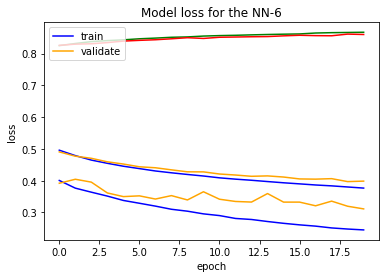

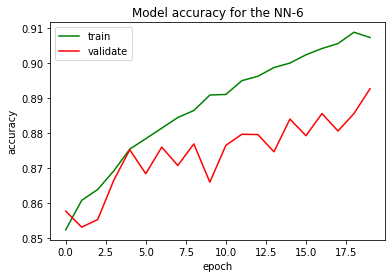

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train/255
X_test = X_test/255
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Training a 3 - Layer Neural Network

# Step 1 - Building the architecture
model_3 = keras.Sequential([
   keras.layers.Flatten(input_shape=[28,28,1]),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 

# Step 2 - Compiling the model
model_3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#Step 3 - Training the model (5 Iterations)
model_3.fit(X_train, Y_train, epochs=5, validation_split=0.2) # 5 epochs

#Step 4 - Evaluate the model
test_loss, test_acc = model_3.evaluate(X_train, Y_train)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

# 3 - Layer Neural Network (20 Iterations)
history_NN3_20=model_3.fit(X_train, Y_train, epochs=20, validation_split=0.2)

test_loss, test_acc = model_3.evaluate(X_train, Y_train)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

#Plot loss results for training data and testing data 
plt.plot(history_NN3_20.history['loss'], 'blue')
plt.plot(history_NN3_20.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

#Plot accuracy results for training data and testing data 
plt.plot(history_NN3_20.history['accuracy'], 'green')
plt.plot(history_NN3_20.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')



#6-layer Neural Network 
model_6 = keras.Sequential([
   keras.layers.Flatten(input_shape=[28,28,1]),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_6.summary() 
model_6.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#6-layer neural network (5 Iterations)
model_6.fit(X_train, Y_train, epochs=5, validation_split=0.2)

#Evaluate the model with test datasets
test_loss, test_acc = model_6.evaluate(X_train, Y_train)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)


#6-layer neural network (20 epochs)
history_NN6_20=model_6.fit(X_train, Y_train, epochs=20, validation_split=0.2)

test_loss, test_acc = model_6.evaluate(X_train, Y_train)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

#Plot loss results for training data and testing data
plt.figure(1)
plt.plot(history_NN6_20.history['loss'], 'blue')
plt.plot(history_NN6_20.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

#Plot accuracy results for training data and testing data 
plt.figure(2)
plt.plot(history_NN6_20.history['accuracy'], 'green')
plt.plot(history_NN6_20.history['val_accuracy'],'red')
plt.title('Model accuracy for the NN-6')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

# 3. Convolution Neural Network

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
    
Y_train = keras.utils.np_utils.to_categorical(Y_train)
Y_test = keras.utils.np_utils.to_categorical(Y_test)

model.compile(keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.10, batch_size=200, epochs=7, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/7


KeyboardInterrupt: 